In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

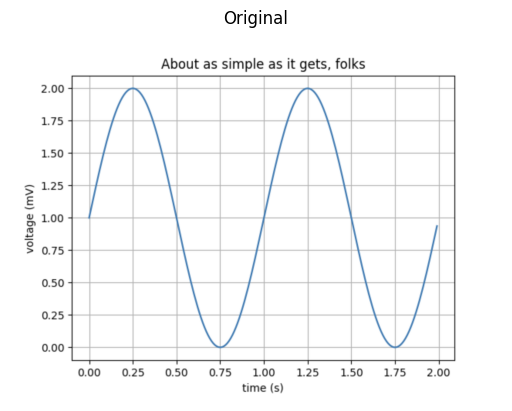

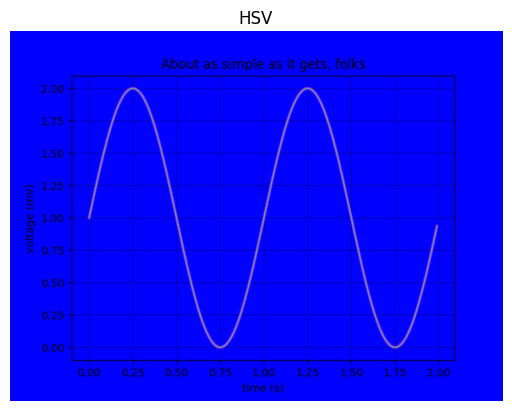

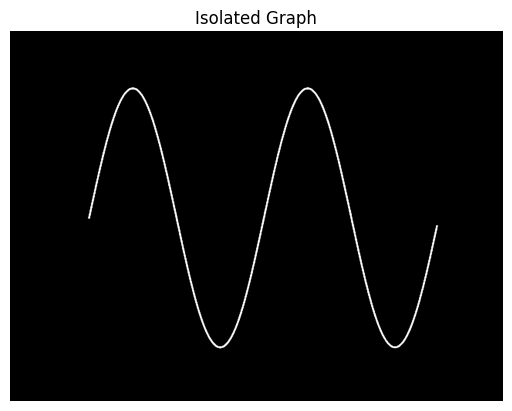

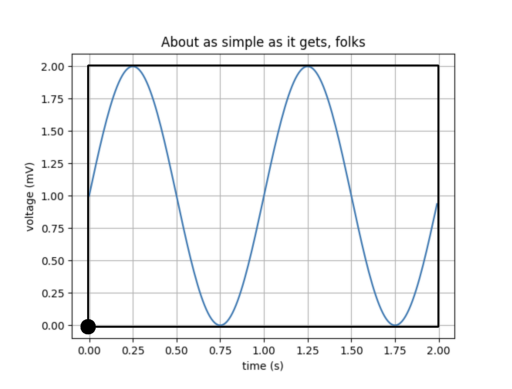

202 824


In [54]:
# Load the image
graph = cv.imread('graph.png')

# Convert To RGB
graph = cv.cvtColor(graph, cv.COLOR_BGR2RGB)
plt.imshow(graph)
plt.axis('off')
plt.title('Original')
plt.show()

# Convert To HSV
graph = cv.cvtColor(graph, cv.COLOR_RGB2HSV)
plt.imshow(graph)
plt.axis('off')
plt.title('HSV')
plt.show()

# 3. Thresholding for the graph line
lower_blue = np.array([100, 50, 50])  # Lower HSV bounds for blue
upper_blue = np.array([140, 255, 255])  # Upper HSV bounds for blue
graph_mask = cv.inRange(graph, lower_blue, upper_blue)
plt.imshow(graph_mask, cmap='gray')
plt.axis('off')
plt.title('Isolated Graph')
plt.show()

def bounding_rect(img):
    """
    Get the bounding rectangle of the largest contour in the image

    Args:
    img: image to get bounding rectangle from (numpy array, grayscale)

    Returns:
    rect: bounding rectangle of the largest contour (tuple, (x, y, w, h))
    """
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    rect = cv.boundingRect(contours[0])
    return rect
x, y, w, h = bounding_rect(graph_mask)

result_img = graph.copy()
cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 0), 3)
cv.circle(result_img, (x, y+h), 20, (0, 0, 0), -1)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.axis('off')
plt.show()

x = x
y = y+h

print(x,y)



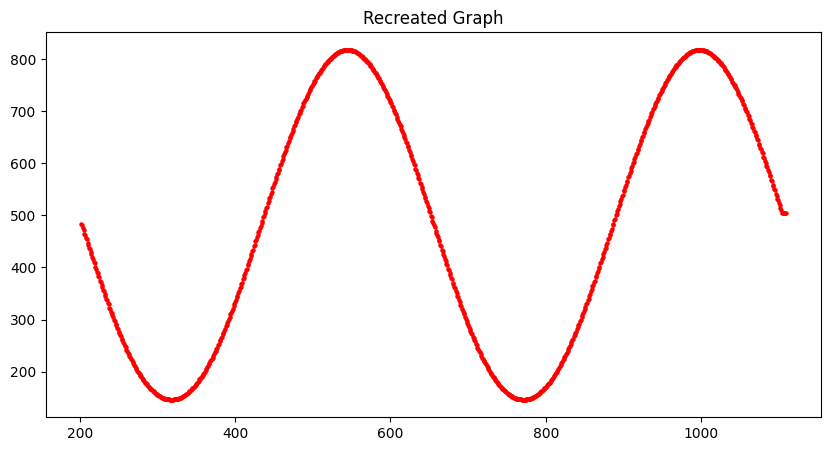

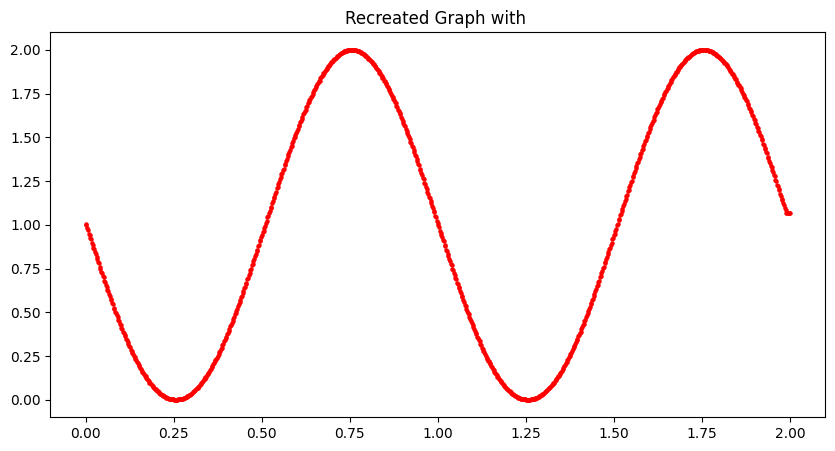

In [56]:
height, width, channels = graph.shape

graph_points = []

for x in range(width):
    for y in range(height):
        if graph_mask[y, x] > 200:
            graph_points.append((x, y))
            break

graph_points = np.array(graph_points)

plt.figure(figsize=(10,5))
plt.scatter(graph_points[:,0], graph_points[:,1], color='red', s=5)
plt.title("Recreated Graph")
plt.show()

x_min = np.min(graph_points[:,0])
x_max = np.max(graph_points[:,0])
scaled_x = 2 * (graph_points[:,0] - x_min) / (x_max - x_min)

y_min = np.min(graph_points[:,1])
y_max = np.max(graph_points[:,1])
scaled_y = 2 * (graph_points[:,1] - y_min) / (y_max - y_min)

plt.figure(figsize=(10,5))
plt.scatter(scaled_x, scaled_y, color='red', s=5)
plt.title("Recreated Graph with ")
plt.show()